In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [416]:
df=pd.read_csv("chandi mandir.csv")
df.head()

,date,population
0,16-01-2022,6
1,22-02-2022,4
2,18-03-2022,4
3,21-06-2022,9
4,16-09-2022,7


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        8 non-null      object
 1   population  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [418]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [419]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-419-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [420]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [421]:
 from prophet import Prophet

In [423]:
population=df.groupby('date')['population'].sum().reset_index()

In [424]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [425]:
model=Prophet(interval_width=0.95)

In [426]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/10g93iq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/lfx4ln8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90707', 'data', 'file=/tmp/tmpqki2d_87/10g93iq6.json', 'init=/tmp/tmpqki2d_87/lfx4ln8h.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelem2at2ei/prophet_model-20230421071952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [427]:
future_dates=model.make_future_dataframe(periods=30)

In [428]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-12   1.757988    5.722415    8.316829     1.757988     1.757988   
1  2022-01-16   1.854203    4.798719    7.211697     1.854203     1.854203   
2  2022-02-22   2.744190    3.684311    6.313456     2.744190     2.744190   
3  2022-03-18   3.321478    2.152967    4.604835     3.321478     3.321478   
4  2022-06-21   5.606579    6.675583    9.176634     5.606579     5.606579   
5  2022-09-16   7.699251    6.478802    8.951280     7.699251     7.699251   
6  2022-11-24   9.358956    3.731996    6.223005     9.358956     9.358956   
7  2023-01-23  10.802178    5.792706    8.242163    10.802178    10.802178   
8  2023-01-24  10.826232   11.904284   14.345913    10.826232    10.826232   
9  2023-01-25  10.850285   14.729266   17.413038    10.850285    10.850285   
10 2023-01-26  10.874339    5.323506    7.819000    10.874339    10.874339   
11 2023-01-27  10.898393    9.631653   12.127927    10.898393   

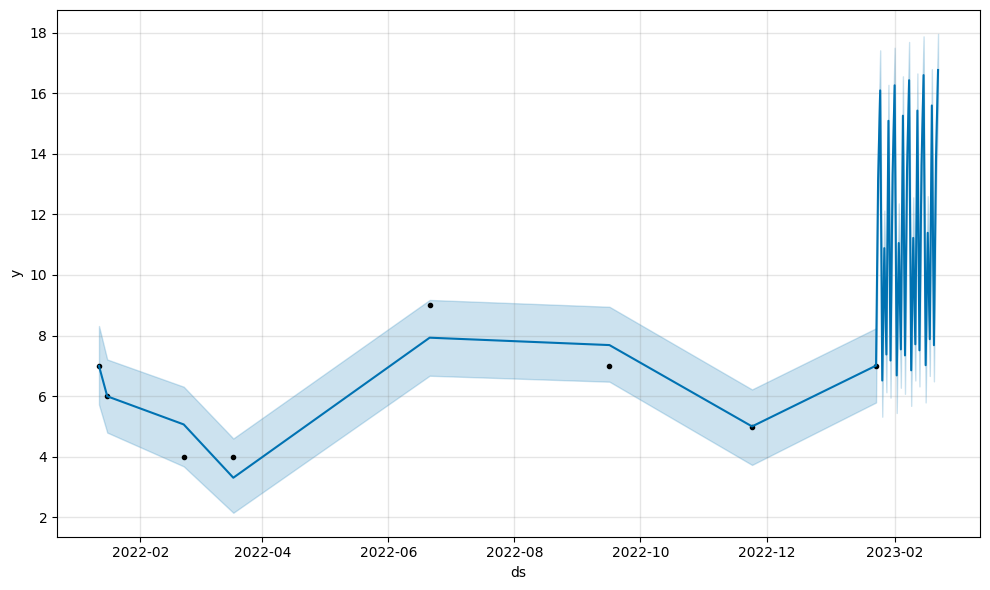

In [429]:
model.plot(forecast)
print(forecast)

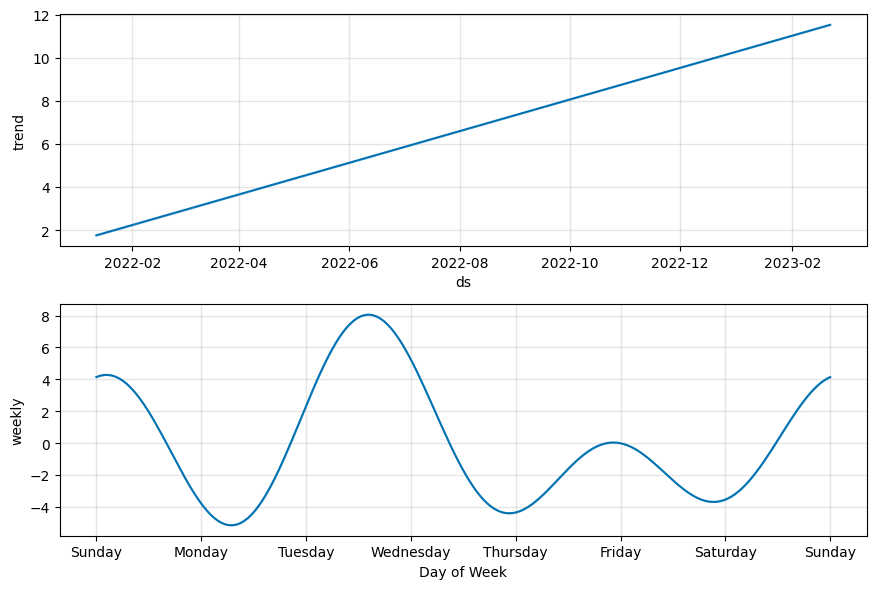

In [430]:
component=model.plot_components(forecast)

In [431]:
 model1=Prophet(interval_width=0.95)

In [432]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/fhn92vqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/reewiblw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84064', 'data', 'file=/tmp/tmpqki2d_87/fhn92vqx.json', 'init=/tmp/tmpqki2d_87/reewiblw.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model5wrgxh94/prophet_model-20230421072008.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:20:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [433]:
future_dates=model1.make_future_dataframe(periods=10)

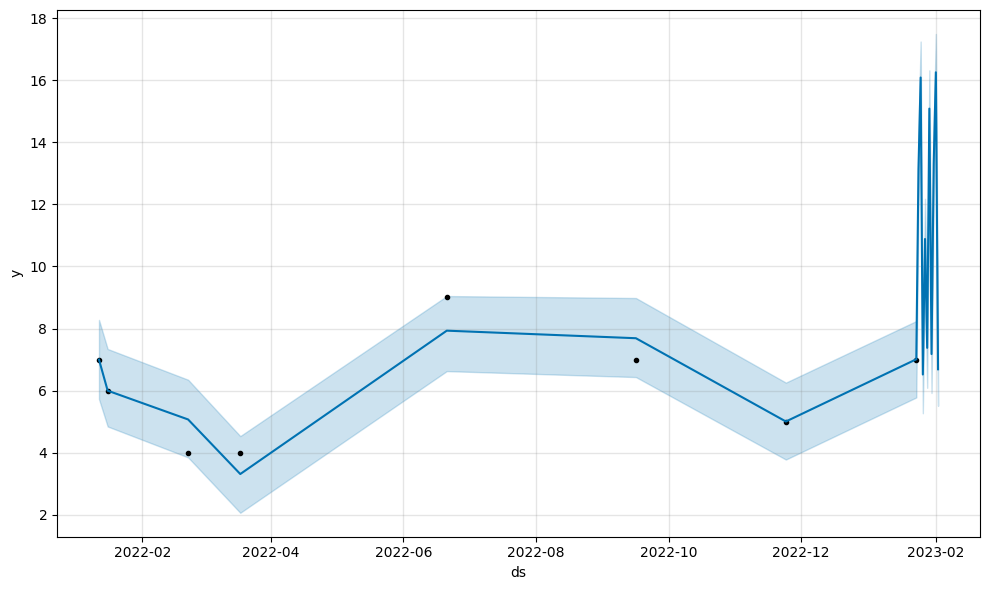

In [434]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-12   1.757988    5.724082    8.278693     1.757988     1.757988   
1  2022-01-16   1.854203    4.841737    7.340497     1.854203     1.854203   
2  2022-02-22   2.744190    3.845647    6.349362     2.744190     2.744190   
3  2022-03-18   3.321478    2.060261    4.532084     3.321478     3.321478   
4  2022-06-21   5.606579    6.627266    9.046846     5.606579     5.606579   
5  2022-09-16   7.699251    6.434822    8.983132     7.699251     7.699251   
6  2022-11-24   9.358956    3.776274    6.256497     9.358956     9.358956   
7  2023-01-23  10.802178    5.778266    8.241398    10.802178    10.802178   
8  2023-01-24  10.826232   11.922205   14.373986    10.826232    10.826232   
9  2023-01-25  10.850285   14.821374   17.250433    10.850285    10.850285   
10 2023-01-26  10.874339    5.269080    7.791083    10.874339    10.874339   
11 2023-01-27  10.898393    9.670266   12.180884    10.898393   

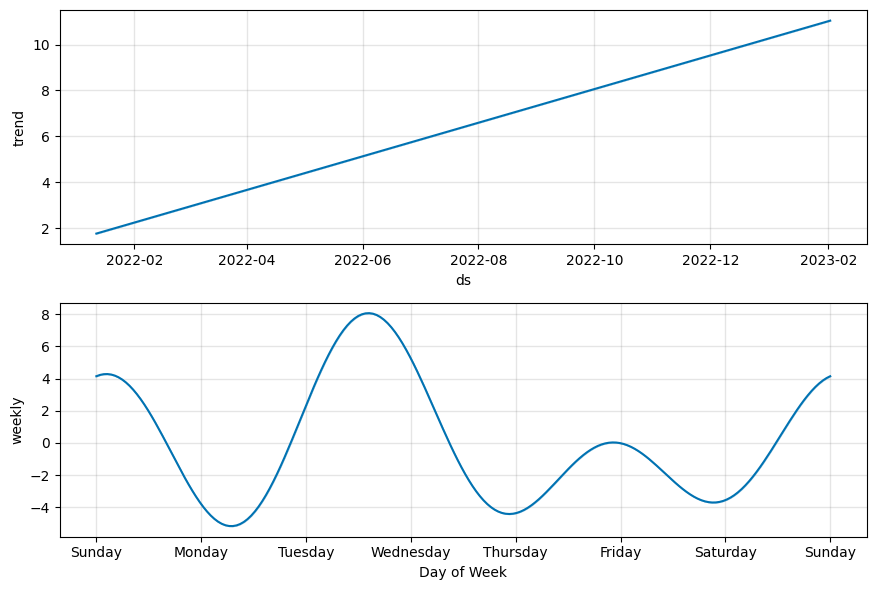

In [435]:
week=model1.plot_components(forecasting)
print(forecasting)